In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import itertools
import pandas as pd

In [2]:
# import data and omit NA
titanic = pd.read_csv("/Users/USER/Desktop/For-Python/datasets_11657_16098_train.csv",encoding="big5").dropna()
titanic.head()
titanic_df2 = titanic[['Sex','Pclass','Age','Survived']]
titanic_df2.head()

,Sex,Pclass,Age,Survived
1,female,1,38.0,1
3,female,1,35.0,1
6,male,1,54.0,0
10,female,3,4.0,1
11,female,1,58.0,1


In [3]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
titanic_df2['Sex'] = encoder.fit_transform(titanic_df2['Sex'])
titanic_df2.head()

<ipython-input-3-adf7405cb762>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df2['Sex'] = encoder.fit_transform(titanic_df2['Sex'])


,Sex,Pclass,Age,Survived
1,0,1,38.0,1
3,0,1,35.0,1
6,1,1,54.0,0
10,0,3,4.0,1
11,0,1,58.0,1


In [4]:
x=titanic_df2[['Sex','Pclass','Age']]
y=titanic_df2[['Survived']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=20170816)

In [5]:
#standardize variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)

x_train_nor = sc.transform(x_train)
x_test_nor = sc.transform(x_test)

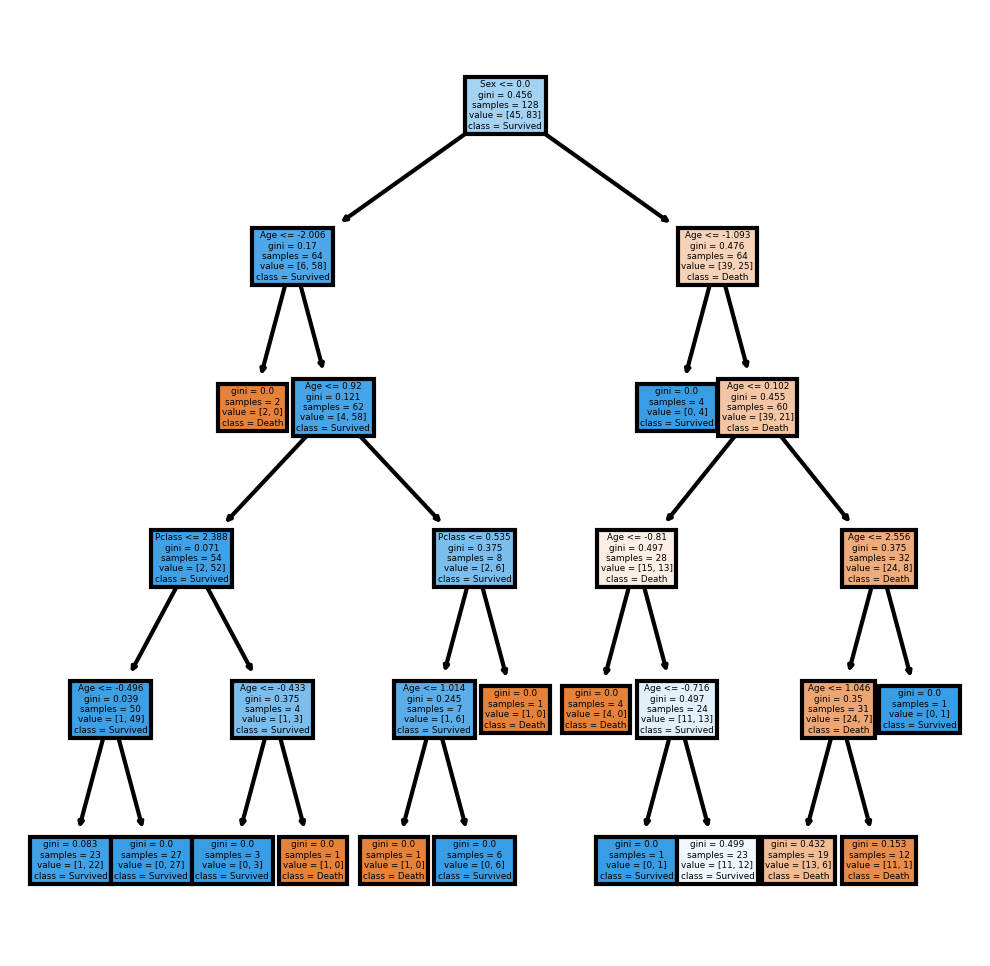

In [6]:
# train a tree model
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state = 119)
tree_clf = tree.fit(x_train_nor,y_train)

# visualize
from sklearn import tree as tr
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tr.plot_tree(tree_clf,
               feature_names = ['Sex','Pclass','Age'],
                class_names =['Death','Survived'],
               filled = True);
fig.savefig('imagename.png')


<ipython-input-7-1207e226e70b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RF.fit(x_train_nor, y_train)


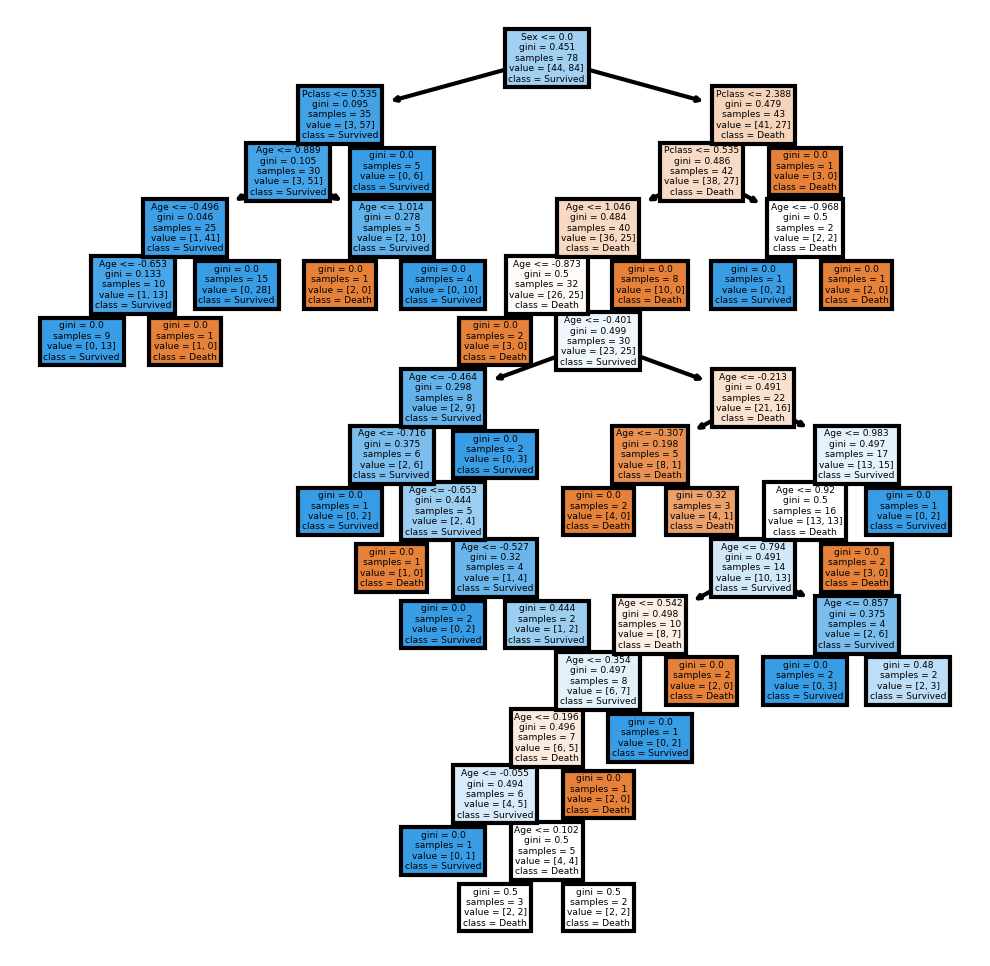

In [7]:
# build a forest model
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=10, random_state=612)
rf = RF.fit(x_train_nor, y_train)

# extract a single tree
estimator = RF.estimators_[5]
                           
# visualize a single tree(5)
from sklearn import tree as tr
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tr.plot_tree(estimator,
               feature_names = ['Sex','Pclass','Age'],
                class_names =['Death','Survived'],
               filled = True);
fig.savefig('imagename.png')

# # visualize a single tree(5)
# estimator = RF.estimators_[5]
# from sklearn.tree import export_graphviz

# export_graphviz(estimator, 
#                 feature_names = ['Sex','Pclass','Age'],
#                 class_names = ['Death','Survived'],
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)
# # Convert to png
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# # Display in python
# import matplotlib.pyplot as plt
# plt.figure(figsize = (14, 18))
# plt.imshow(plt.imread('tree.png'))
# plt.axis('off')
# plt.show()

In [8]:
## Tree
# predict
pred_tree = tree_clf.predict(x_test_nor)

# Accuracy
from sklearn import metrics
acc = metrics.accuracy_score(y_test,pred_tree)
print(acc)

0.8


In [9]:
## RF
# predict
pred_rf = rf.predict(x_test_nor)

# Accuracy
from sklearn import metrics
acc = metrics.accuracy_score(y_test,pred_rf)
print(acc)

0.7818181818181819


In [10]:
## Tree
# confusion matrix
from sklearn.metrics import confusion_matrix
cnf_tree = confusion_matrix(y_test, pred_tree)
print(cnf_tree)

[[13  2]
 [ 9 31]]


In [11]:
## RF
# confusion matrix
from sklearn.metrics import confusion_matrix
cnf_rf = confusion_matrix(y_test, pred_rf)
print(cnf_rf)

[[11  4]
 [ 8 32]]


Confusion matrix, without normalization
[[13  2]
 [ 9 31]]


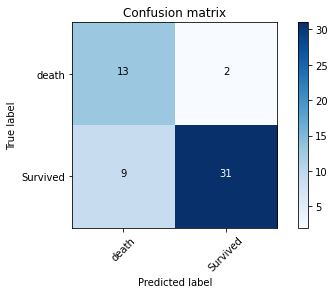

In [12]:
# visualize the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cnf_tree, classes=['death','Survived'],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

Confusion matrix, without normalization
[[11  4]
 [ 8 32]]


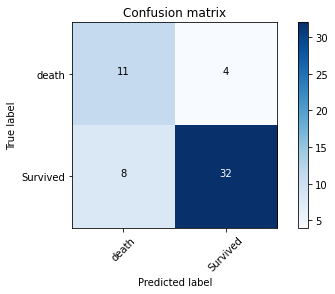

In [13]:
# visualize the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cnf_rf, classes=['death','Survived'],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)